In [1]:
# pip install torch torchvision

In [2]:
# pip install --upgrade 'optree>=0.13.0'

In [3]:
import torch
from torch import nn
import torchvision
from torch.utils.data import DataLoader, random_split
from torchvision import transforms
import matplotlib.pyplot as plt
import numpy as np

### Loading and Preparing Data ###

In [4]:
transform  = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,),(0.5,))
])

In [5]:
train_data = torchvision.datasets.FashionMNIST(root='./data',download=True, transform=transform)

In [6]:
train_size = int(0.7* len(train_data))
val_size = len(train_data) - train_size

train_data_new, val_data = random_split(train_data,[train_size,val_size])

In [7]:
test_data = torchvision.datasets.FashionMNIST(root='./data',download=True,transform=transform,train= False)

In [8]:
print(f"Number of training samples: {len(train_data_new)}")

Number of training samples: 42000


In [9]:
print(f"Number of testing samples: {len(test_data)}")

Number of testing samples: 10000


In [10]:
train_dataloader = DataLoader(train_data_new,batch_size=60,shuffle=True)
test_dataloader = DataLoader(test_data,batch_size=10, shuffle=True)
val_dataloader = DataLoader(val_data,batch_size=18,shuffle=False)

In [11]:
for X,y in test_dataloader:
    print(f'Shape of X : {X.shape} || Shape of Y : {y.shape} {y.dtype}')

Shape of X : torch.Size([10, 1, 28, 28]) || Shape of Y : torch.Size([10]) torch.int64
Shape of X : torch.Size([10, 1, 28, 28]) || Shape of Y : torch.Size([10]) torch.int64
Shape of X : torch.Size([10, 1, 28, 28]) || Shape of Y : torch.Size([10]) torch.int64
Shape of X : torch.Size([10, 1, 28, 28]) || Shape of Y : torch.Size([10]) torch.int64
Shape of X : torch.Size([10, 1, 28, 28]) || Shape of Y : torch.Size([10]) torch.int64
Shape of X : torch.Size([10, 1, 28, 28]) || Shape of Y : torch.Size([10]) torch.int64
Shape of X : torch.Size([10, 1, 28, 28]) || Shape of Y : torch.Size([10]) torch.int64
Shape of X : torch.Size([10, 1, 28, 28]) || Shape of Y : torch.Size([10]) torch.int64
Shape of X : torch.Size([10, 1, 28, 28]) || Shape of Y : torch.Size([10]) torch.int64
Shape of X : torch.Size([10, 1, 28, 28]) || Shape of Y : torch.Size([10]) torch.int64
Shape of X : torch.Size([10, 1, 28, 28]) || Shape of Y : torch.Size([10]) torch.int64
Shape of X : torch.Size([10, 1, 28, 28]) || Shape of Y

In [12]:
for X,y in train_dataloader:
    print(f'Shape of X : {X.shape} || Shape of Y : {y.shape} {y.dtype}')

Shape of X : torch.Size([60, 1, 28, 28]) || Shape of Y : torch.Size([60]) torch.int64
Shape of X : torch.Size([60, 1, 28, 28]) || Shape of Y : torch.Size([60]) torch.int64
Shape of X : torch.Size([60, 1, 28, 28]) || Shape of Y : torch.Size([60]) torch.int64
Shape of X : torch.Size([60, 1, 28, 28]) || Shape of Y : torch.Size([60]) torch.int64
Shape of X : torch.Size([60, 1, 28, 28]) || Shape of Y : torch.Size([60]) torch.int64
Shape of X : torch.Size([60, 1, 28, 28]) || Shape of Y : torch.Size([60]) torch.int64
Shape of X : torch.Size([60, 1, 28, 28]) || Shape of Y : torch.Size([60]) torch.int64
Shape of X : torch.Size([60, 1, 28, 28]) || Shape of Y : torch.Size([60]) torch.int64
Shape of X : torch.Size([60, 1, 28, 28]) || Shape of Y : torch.Size([60]) torch.int64
Shape of X : torch.Size([60, 1, 28, 28]) || Shape of Y : torch.Size([60]) torch.int64
Shape of X : torch.Size([60, 1, 28, 28]) || Shape of Y : torch.Size([60]) torch.int64
Shape of X : torch.Size([60, 1, 28, 28]) || Shape of Y

In [13]:
for X,y in val_dataloader:
    print(f'Shape of X : {X.shape} || Shape of Y : {y.shape} {y.dtype}')

Shape of X : torch.Size([18, 1, 28, 28]) || Shape of Y : torch.Size([18]) torch.int64
Shape of X : torch.Size([18, 1, 28, 28]) || Shape of Y : torch.Size([18]) torch.int64
Shape of X : torch.Size([18, 1, 28, 28]) || Shape of Y : torch.Size([18]) torch.int64
Shape of X : torch.Size([18, 1, 28, 28]) || Shape of Y : torch.Size([18]) torch.int64
Shape of X : torch.Size([18, 1, 28, 28]) || Shape of Y : torch.Size([18]) torch.int64
Shape of X : torch.Size([18, 1, 28, 28]) || Shape of Y : torch.Size([18]) torch.int64
Shape of X : torch.Size([18, 1, 28, 28]) || Shape of Y : torch.Size([18]) torch.int64
Shape of X : torch.Size([18, 1, 28, 28]) || Shape of Y : torch.Size([18]) torch.int64
Shape of X : torch.Size([18, 1, 28, 28]) || Shape of Y : torch.Size([18]) torch.int64
Shape of X : torch.Size([18, 1, 28, 28]) || Shape of Y : torch.Size([18]) torch.int64
Shape of X : torch.Size([18, 1, 28, 28]) || Shape of Y : torch.Size([18]) torch.int64
Shape of X : torch.Size([18, 1, 28, 28]) || Shape of Y

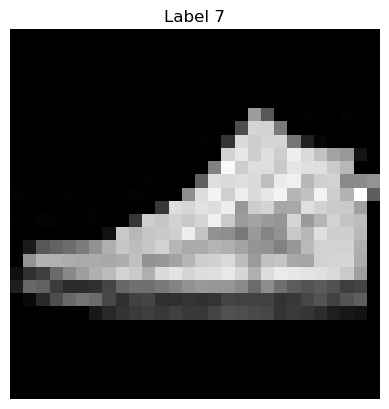

In [14]:
img, label = train_data_new[0]
plt.imshow(img.squeeze(), cmap='gray')
plt.title(f'Label {label}')
plt.axis('off')
plt.show()

### Creating Model ###

In [15]:
class NeuralNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.flat = nn.Flatten()
        self.linear_stack = nn.Sequential(
            nn.Linear(28*28,512),
            nn.ReLU(),
            nn.Dropout(0.7),
            nn.Linear(512,512),
            nn.ReLU(),
            nn.Linear(512,10)
        )

    def forward(self,x):
        x = self.flat(x)
        logits = self.linear_stack(x)
        return logits

model = NeuralNet()
print(model)

NeuralNet(
  (flat): Flatten(start_dim=1, end_dim=-1)
  (linear_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.7, inplace=False)
    (3): Linear(in_features=512, out_features=512, bias=True)
    (4): ReLU()
    (5): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [16]:
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(),lr=0.001)

In [17]:
train_losses = []
val_losses = []
acc_list = []

In [18]:
def validate(val_data,model,loss_func):
    size = len(val_data.dataset)
    num_batches = len(val_data)

    model.eval()

    test_loss, acc = 0,0 
    with torch.no_grad():
        for X, y in val_data:
            preds = model(X)
            if isinstance(y, int):  # If y is a single integer
                y = torch.tensor([y], dtype=torch.long)  # Convert it to a tensor
            else:
                y = torch.tensor(y, dtype=torch.long) 
            test_loss += loss_func(preds,y).item()
            acc += (preds.argmax(1) == y).type(torch.float).sum().item()

        test_loss /= num_batches
        acc /= size

        val_losses.append(test_loss)
        acc_list.append(acc*100)
        print(f"Test Error: \n Accuracy: {(100*acc):>0.1f}%, Avg loss: {test_loss:>8f} \n")
        

In [19]:
def train(train_data, val_data, model, loss_fun, optimizer):
    size = len(train_data.dataset)
    model.train()

    epoch_loss = 0 

    for batch, (X, y) in enumerate(train_data):
        preds = model(X)
        loss = loss_fun(preds, y)

        epoch_loss += loss.item()
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch%100 == 0:
            loss, curr = loss.item(), (batch+1)*len(X)
            print(f"loss: {loss:>7f}  [{curr:>5d}/{size:>5d}]")

    avg_train_loss = epoch_loss / len(train_data)
    train_losses.append(avg_train_loss)
    validate(val_data,model, loss_fun)

In [20]:
EPOCHS = 20
train_losses.clear()
val_losses.clear()
acc_list.clear()
for epoch in range(EPOCHS):
    print(f"Epoch{epoch+1}\n---------------------------------")
    train(train_dataloader,val_dataloader, model, loss_func, optimizer)

print("Done!!")

Epoch1
---------------------------------
loss: 2.310606  [   60/42000]
loss: 2.266897  [ 6060/42000]
loss: 2.267375  [12060/42000]
loss: 2.234010  [18060/42000]
loss: 2.211447  [24060/42000]
loss: 2.131094  [30060/42000]
loss: 2.075799  [36060/42000]


/var/folders/0m/4hw6y0_118q535jgs9dp4h440000gn/T/ipykernel_17905/2705209251.py:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y, dtype=torch.long)


Test Error: 
 Accuracy: 47.6%, Avg loss: 2.012052 

Epoch2
---------------------------------
loss: 2.074096  [   60/42000]
loss: 2.014162  [ 6060/42000]
loss: 2.003695  [12060/42000]
loss: 1.866550  [18060/42000]
loss: 1.905335  [24060/42000]
loss: 1.829140  [30060/42000]
loss: 1.753221  [36060/42000]
Test Error: 
 Accuracy: 58.9%, Avg loss: 1.567388 

Epoch3
---------------------------------
loss: 1.561305  [   60/42000]
loss: 1.478529  [ 6060/42000]
loss: 1.662041  [12060/42000]
loss: 1.572456  [18060/42000]
loss: 1.413271  [24060/42000]
loss: 1.332935  [30060/42000]
loss: 1.279224  [36060/42000]
Test Error: 
 Accuracy: 67.5%, Avg loss: 1.212828 

Epoch4
---------------------------------
loss: 1.339003  [   60/42000]
loss: 1.386817  [ 6060/42000]
loss: 1.238430  [12060/42000]
loss: 1.087431  [18060/42000]
loss: 1.199545  [24060/42000]
loss: 1.222956  [30060/42000]
loss: 0.980318  [36060/42000]
Test Error: 
 Accuracy: 70.1%, Avg loss: 1.006071 

Epoch5
--------------------------------

### Plotting the results ###

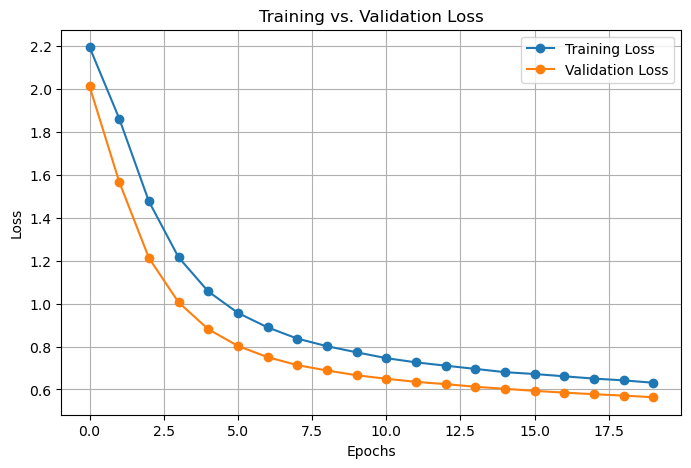

In [21]:
plt.figure(figsize=(8, 5))
plt.plot(train_losses, label="Training Loss", marker="o")
plt.plot(val_losses, label="Validation Loss", marker="o")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training vs. Validation Loss")
plt.legend()
plt.grid()
plt.show()

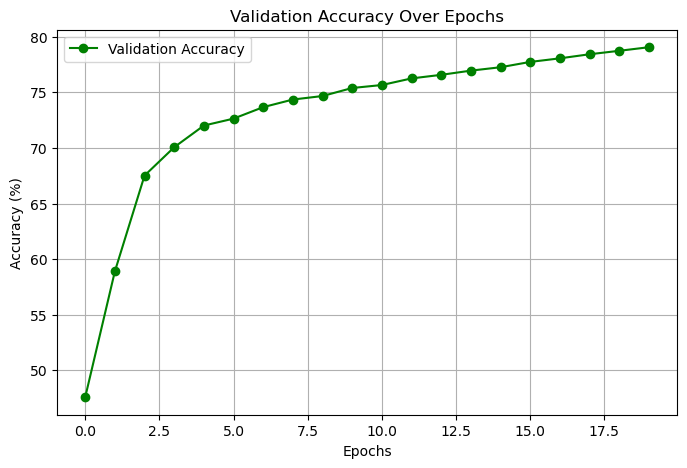

In [22]:
plt.figure(figsize=(8, 5))
plt.plot(acc_list, label="Validation Accuracy", marker="o", color="green")
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.title("Validation Accuracy Over Epochs")
plt.legend()
plt.grid()
plt.show()

### Predicting on test data points ###

In [23]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [24]:
X_test, y_test = test_data.data[45:51], test_data.targets[45:51]

In [25]:
X_test = X_test.float()
X_test = X_test/255.0

In [26]:
new_preds = model(X_test)
new_preds = torch.argmax(new_preds, dim=-1)
new_preds = new_preds.numpy()
print(new_preds)

[9 2 1 4 4 2]


In [27]:
np.array(class_names)[new_preds]

array(['Ankle boot', 'Pullover', 'Trouser', 'Coat', 'Coat', 'Pullover'],
      dtype='<U11')

In [28]:
np.array(class_names)[y_test]

array(['Sneaker', 'Pullover', 'Trouser', 'Pullover', 'Pullover', 'Coat'],
      dtype='<U11')

### Internal informations about the network ###

In [29]:
st_dict = model.state_dict()

In [30]:
print(st_dict)

OrderedDict([('linear_stack.0.weight', tensor([[-0.0143, -0.0380,  0.0018,  ...,  0.0185,  0.0264,  0.0302],
        [-0.0018, -0.0231,  0.0171,  ..., -0.0211,  0.0335,  0.0248],
        [-0.0140,  0.0089, -0.0013,  ...,  0.0269, -0.0363, -0.0134],
        ...,
        [ 0.0181, -0.0034, -0.0192,  ..., -0.0181,  0.0039,  0.0250],
        [-0.0216, -0.0059, -0.0248,  ...,  0.0305,  0.0067, -0.0194],
        [ 0.0118,  0.0137,  0.0276,  ..., -0.0020, -0.0008,  0.0162]])), ('linear_stack.0.bias', tensor([ 1.9899e-02, -1.4204e-02, -1.3017e-02,  2.8386e-03,  2.3516e-02,
         2.6866e-02, -2.7244e-02,  1.6679e-02, -1.0543e-02,  3.5711e-02,
        -8.2766e-03,  3.2930e-02,  8.0992e-03, -2.1645e-02,  1.8934e-02,
        -3.1363e-02, -1.3671e-02,  1.5323e-02,  3.2498e-02,  2.7048e-02,
         2.8117e-02,  2.4192e-02,  1.4944e-02,  2.1009e-02, -1.8487e-02,
         3.1209e-02,  1.3455e-02, -2.7370e-04, -2.1748e-02,  5.1512e-03,
        -1.3217e-02, -3.2104e-02, -3.1015e-02,  1.5542e-02, -4.